<a href="https://colab.research.google.com/github/Dennis-Farias/data_science/blob/main/Aula_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Definindo a paleta de cores
AZUL1, AZUL2, AZUL3, AZUL4, AZUL5 = '#03045e', '#0077b6', "#00b4d8", '#90e0ef', '#CDDBF3'
CINZA1, CINZA2, CINZA3, CINZA4, CINZA5 = '#212529', '#495057', '#adb5bd', '#dee2e6', '#f8f9fa'
VERMELHO1, LARANJA1, AMARELO1, VERDE1, VERDE2 = '#e76f51', '#f4a261',	'#e9c46a', '#4c956c', '#2a9d8f'

In [2]:
import pandas as pd

In [ ]:
vendas = pd.read_csv('relatorio_vendas.csv')
vendas['data_pedido'] = pd.to_datetime(vendas['data_pedido'], format='%Y-%m-%d')
vendas['data_envio'] = pd.to_datetime(vendas['data_envio'], format='%Y-%m-%d')

vendas

In [ ]:
vendas.info()

**Pergunta 1** - Qual o total de vendas por ano? E qual ano performou melhor em nossa base de dados?

In [ ]:
# Criando um df com os dados desejados
df_vendas_ano = vendas.copy()
df_vendas_ano = df_vendas_ano[['data_pedido', 'vendas']]

# Gerando uma coluna que representa apenas os anos puxando-os da coluna data pedido
df_vendas_ano['ano'] = df_vendas_ano['data_pedido'].dt.year
df_vendas_ano.drop(labels='data_pedido', axis=1, inplace=True)

# Agrupando os dados por ano
df_vendas_ano = df_vendas_ano.groupby(['ano']).aggregate('sum')

df_vendas_ano

In [ ]:
def grafico_vendas(cores: list=[AZUL2]):
  import matplotlib.pyplot as plt
  import seaborn as sns

  fig, ax = plt.subplots(figsize=(10, 4))
  sns.set_theme(style='white')

  ax = sns.barplot(data=df_vendas_ano, x=df_vendas_ano.index, y='vendas', palette = cores)

  ax.set_title('Vendas das lojas de departamentos de \n2016 a 2019', loc='left', fontsize=18, color=CINZA1)
  ax.set_xlabel('')
  ax.set_ylabel('')
  ax.xaxis.set_tick_params(labelsize=14, labelcolor=CINZA2)
  sns.despine(left=True, bottom=True)

  ax.set_yticklabels([])
  for i, valor in enumerate(df_vendas_ano['vendas']):
    qtd = f'R$ {valor:,.0f}'.replace(',', '.')
    offset = 1e5
    ax.text(i, valor + offset, qtd, ha='center', fontsize=12, color=CINZA2, va = 'center')

  return ax

ax = grafico_vendas()

<ipython-input-8-6dacbb14d9f8>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_vendas_ano, x=df_vendas_ano.index, y='vendas', palette = cores)


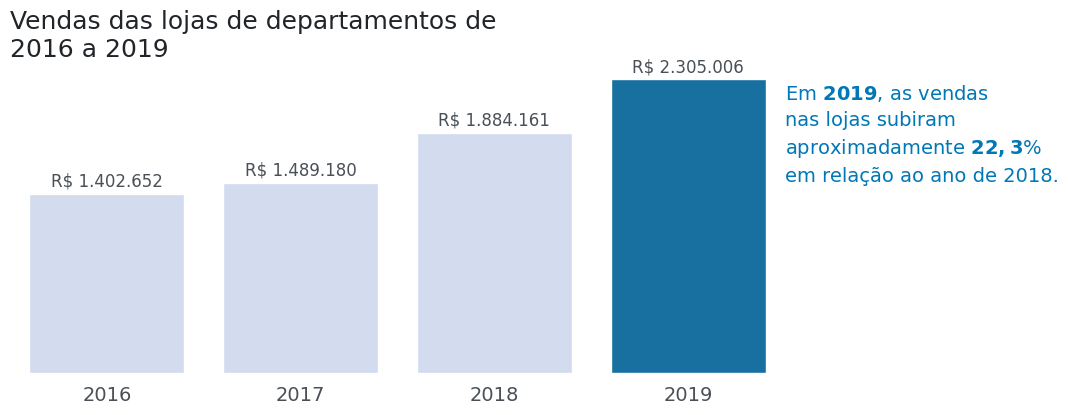

In [ ]:
cores = []
for ano in df_vendas_ano.index:
  if df_vendas_ano.loc[ano, 'vendas'] == df_vendas_ano['vendas'].max():
    cores.append(AZUL2)
  else:
    cores.append(AZUL5)

ax = grafico_vendas(cores)

# Anotando uma conclusão no gráfico
ax.text(3.5, 1.5e6,
         'Em $\\bf{2019}$, as vendas\n'
         'nas lojas subiram\n'
         'aproximadamente $\\bf{22,3}$%\n'
         'em relação ao ano de 2018.',
         fontsize=14, linespacing=1.45, color=AZUL2)

fig = ax.get_figure()

**Pergunta 2** - Qual é o top7 produtos que mais apresentaram lucros em nosso catálogo durante o período representado?

In [ ]:
top_lucro = vendas.copy()
top_lucro = top_lucro[['tipo_produto', 'lucro']]

top_lucro = top_lucro.groupby(['tipo_produto']).aggregate('sum').sort_values('lucro', ascending=False)

top_7 = top_lucro[:7]

top_7

In [ ]:
def grafico_top_7():
  import matplotlib.pyplot as plt
  import seaborn as sns

  fig, ax = plt.subplots(figsize=(10, 4))
  fig.subplots_adjust(right=0.7)
  sns.set_theme(style='white')

  cores = [AZUL2, AZUL2, AZUL2, VERDE1, VERDE1, CINZA3, VERDE1]

  ax = sns.barplot(data=top_7, x='lucro', y=top_7.index, palette = cores)

  ax.set_title('Top 7 produtos com maior lucro no catálogo (2016-2019)\n', loc='left', fontsize=18, color=CINZA1)
  ax.set_xlabel('')
  ax.set_ylabel('')
  ax.set_xticklabels([])
  ax.yaxis.set_tick_params(labelsize=10, labelcolor=CINZA2)
  sns.despine(left=True, bottom=True)

  for i, valor in enumerate(top_7['lucro']):
    qtd = f'R$ {valor:,.0f}'.replace(',', '.')
    offset = 1e3
    ax.text(valor - offset, i, qtd, ha='right', fontsize=10, color=CINZA5, va = 'center', fontweight='bold')

  return ax

ax = grafico_top_7()

In [ ]:
from matplotlib import transforms

def texto_colorido(x, y, texto, cores, esp=20, ax=None, **kw):
    cores = list(reversed(cores))
    t = ax.transData
    canvas = ax.figure.canvas

    for i, linha in enumerate(reversed(texto.split('\n'))):
        frases = linha.split('||')
        for s, cor in zip(frases, cores[i]):
            texto = ax.text(x, y, s, color=cor, transform=t, **kw)
            texto.draw(canvas.get_renderer())
            ex = texto.get_window_extent()
            t = transforms.offset_copy(texto._transform, x=ex.width,
                                       units='dots')

        t = transforms.offset_copy(ax.transData, x=0, y=(i + 1) * esp, units='dots')

<ipython-input-11-322333da233d>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_7, x='lucro', y=top_7.index, palette = cores)


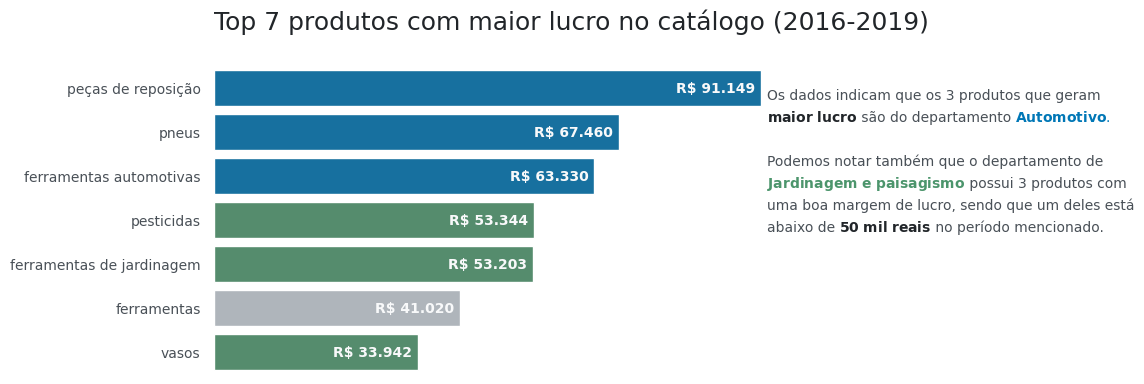

In [ ]:
## Configurando o gráfico com parâmetros que potencializam a visualização dos dados

# Chamando a função do gráfico de barras
ax = grafico_top_7()

# Anotando uma conclusão no gráfico
texto_colorido(
    9.2e4, 3.25,                                                       			 # coordenadas
    'Os dados indicam que os 3 produtos que geram\n'                    # texto
    '$\\bf{maior\ lucro}$|| são do departamento ||$\\bf{Automotivo}$.\n'
    '\n'
    'Podemos notar também que o departamento de\n'
    '$\\bf{Jardinagem\ e\ paisagismo}$|| possui 3 produtos com\n'
    'uma boa margem de lucro, sendo que um deles está\n'
    'abaixo de ||$\\bf{50\ mil\ reais}$|| no período mencionado.',
    [[CINZA2],                       	           # linha 1                         		 # cores
     [CINZA1, CINZA2, AZUL2],         # linha 2
     [CINZA2],                                     # linha 3
     [CINZA2],                       	          # linha 4
     [VERDE1, CINZA2],                   # linha 5
     [CINZA2],                                    # linha 6
     [CINZA2, CINZA1, CINZA2]        # linha 7
    ],
    esp=22,				 # espaçamento
    ax=ax,				 # figura onde desenhar o texto
    fontsize=10)

fig = ax.get_figure()

**Pergunta 3** - Se separarmos o total de vendas por ano por região? O que conseguimos observar em nossos dados?

In [ ]:
df_vendas_reg = vendas.copy()
df_vendas_reg = df_vendas_reg[['regiao', 'vendas', 'data_pedido']]

df_vendas_reg['ano'] = df_vendas_reg['data_pedido'].dt.year
df_vendas_reg.drop(labels='data_pedido', axis=1, inplace=True)

df_vendas_reg

In [ ]:
vendas_reg = pd.crosstab(index = df_vendas_reg.ano, columns = df_vendas_reg.regiao,
                         values = df_vendas_reg.vendas, aggfunc='sum')

vendas_reg = vendas_reg[['Sudeste', 'Nordeste', 'Centro-Oeste', 'Norte', 'Sul']]
vendas_reg

In [ ]:
def grafico_vendas_regiao():
  cores = [AZUL2, AZUL3, AZUL4, CINZA3, CINZA4]

  ax = vendas_reg.plot(kind='bar', stacked=True, figsize=(10, 6), color=cores)

  ax.set_title('Vendas das lojas de departamentos por região \nde 2016 a 2019', loc='left', fontsize=22, color=CINZA1)
  ax.set_xlabel('')
  ax.set_ylabel('')
  ax.set_yticklabels([])
  ax.xaxis.set_tick_params(labelsize=14, labelcolor=CINZA2, rotation = 0)
  ax.set_frame_on(False)

  ax.tick_params(axis='both', which='both', length=0)

  ax.text(3.35, 1.1e6, '87%', fontweight='bold', fontsize=20, color=AZUL1)
  ax.text(3.35, 5.5e5,
          'das vendas nas lojas\n'
          'estão concentradas nas regiões\n'
          '$\\bf{Sudeste}$, $\\bf{Nordeste}$ e\n'
          '$\\bf{Centro-Oeste}$ em 2019.',
          fontsize=14,
          linespacing=1.45,
          color=AZUL1)

  return ax

ax = grafico_vendas_regiao()

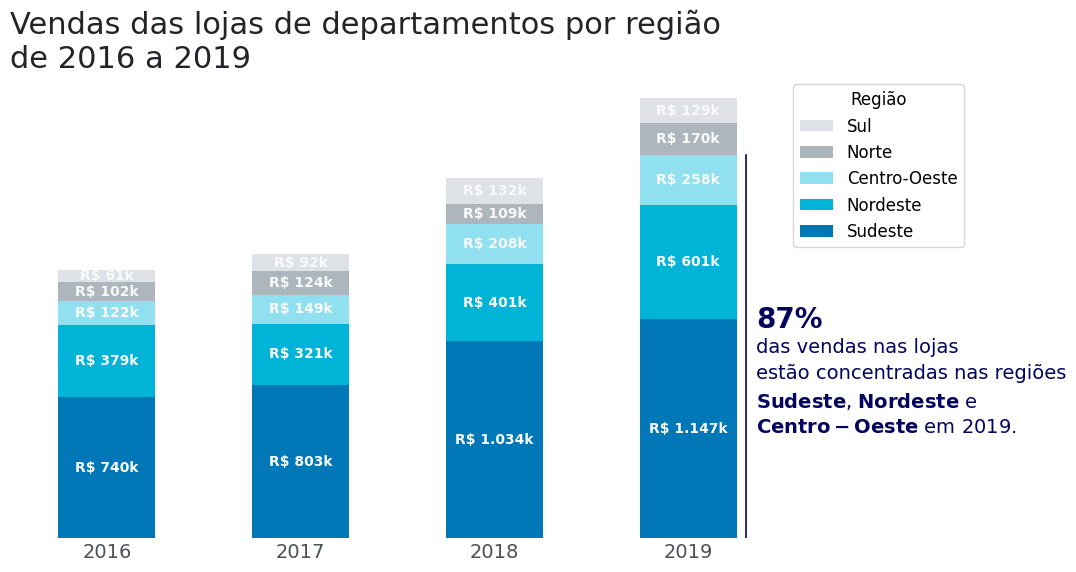

In [13]:
ax = grafico_vendas_regiao()

ax.legend(bbox_to_anchor=(1, 1), reverse=True, title='Região', title_fontsize=12, fontsize=12)

for container in ax.containers:
  labels = [f'R$ {valor.get_height()/1000:,.0f}k'.replace(',', '.') for valor in container]
  ax.bar_label(container, labels=labels, label_type='center', size=10, color=CINZA5, fontweight='bold')

ax.axvline(x=3.3, ymin=0, ymax=0.83, color=AZUL1, linewidth=1.2)

fig = ax.get_figure()

**Pergunta 4** - Qual o modo de envio mais utilizado pelos clientes da loja? É proporcional para B2B e B2C?

In [ ]:
df_envio = vendas.copy()
df_envio = df_envio[['modo_envio', 'segmento_cliente']]

df_envio_seg = pd.crosstab(index = df_envio.modo_envio, columns = df_envio.segmento_cliente).sort_values('B2B')

df_envio_seg

In [ ]:
df_envio_normalizado = pd.crosstab(index = df_envio.modo_envio, columns = df_envio.segmento_cliente, normalize='index')
df_envio_normalizado

In [19]:
from matplotlib import transforms

def texto_colorido(x, y, texto, cores, esp=20, ax=None, **kw):
    cores = list(reversed(cores))
    t = ax.transData
    canvas = ax.figure.canvas

    for i, linha in enumerate(reversed(texto.split('\n'))):
        frases = linha.split('||')
        for s, cor in zip(frases, cores[i]):
            texto = ax.text(x, y, s, color=cor, transform=t, **kw)
            texto.draw(canvas.get_renderer())
            ex = texto.get_window_extent()
            t = transforms.offset_copy(texto._transform, x=ex.width,
                                       units='dots')

        t = transforms.offset_copy(ax.transData, x=0, y=(i + 1) * esp, units='dots')

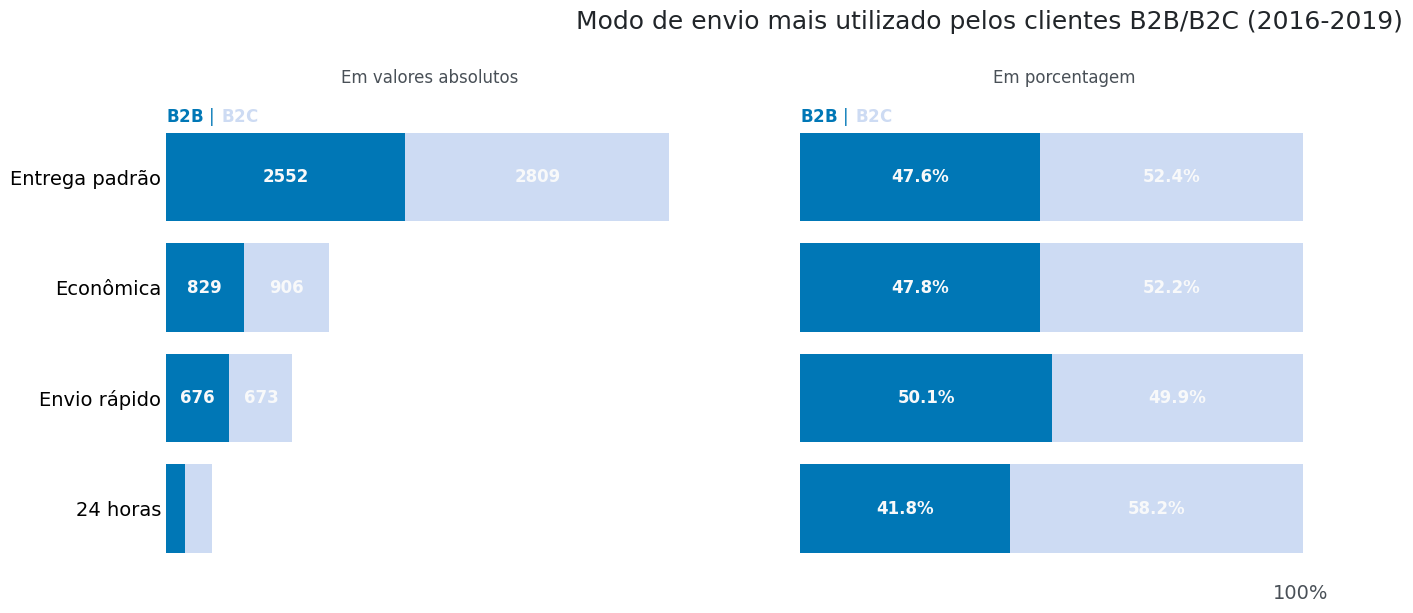

In [22]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1,2, figsize=(15,6), sharey=True)

cores = [AZUL2, AZUL5]

# GRÁFICO 1 - Barras empilhadas

axs[0].barh(df_envio_seg.index, df_envio_seg["B2B"], color = cores[0])
axs[0].barh(df_envio_seg.index, df_envio_seg["B2C"], left = df_envio_seg["B2B"], color = cores[1])
axs[0].set_title('Em valores absolutos\n', color = CINZA2)
axs[0].set_xlabel('')
axs[0].set_ylabel('')
axs[0].set_xticklabels([])
axs[0].yaxis.set_tick_params(labelsize=14, color = CINZA2)
axs[0].set_frame_on(False)

# remover todos os ticks do eixo x e y
axs[0].tick_params(axis='both', which='both', length=0)

texto_colorido(0, 3.5, '$\\bf{B2B}$ | || $\\bf{B2C}$', cores = [cores], ax=axs[0], fontsize=12) # legenda

# GRÁFICO 2 - Barras empilhadas 100 %

axs[1].barh(df_envio_normalizado.index, df_envio_normalizado["B2B"], color = cores[0])
axs[1].barh(df_envio_normalizado.index, df_envio_normalizado["B2C"], left = df_envio_normalizado["B2B"], color = cores[1])
axs[1].set_title('Em porcentagem\n', color = CINZA2)
axs[1].set_xlabel('100%', color = CINZA2, size = 14, loc='right')
axs[1].set_ylabel('')
axs[1].set_xticklabels([])
axs[1].set_frame_on(False)

# remover todos os ticks do eixo x e y
axs[1].tick_params(axis='both', which='both', length=0)

texto_colorido(0, 3.5, '$\\bf{B2B}$ | || $\\bf{B2C}$', cores = [cores], ax=axs[1], fontsize=12) # legenda

# Título dos gráficos
fig.suptitle("Modo de envio mais utilizado pelos clientes B2B/B2C (2016-2019)\n",
             fontsize=18, color=CINZA1, ha = 'right', x = 0.95, y = 1.05)

# Valores das barras
for container in axs[0].containers:
    labels = [str(valor.get_width()) if valor.get_width() > 300 else '' for valor in container]
    axs[0].bar_label(container, label_type='center', labels = labels, size = 12, color = CINZA5, fontweight='bold')

for container in axs[1].containers:
    labels = [f'{valor.get_width()*100:.1f}%' for valor in container]
    axs[1].bar_label(container, label_type='center', labels = labels, size = 12, color = CINZA5, fontweight='bold')

fig.show()